In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
file_path = '/content/cardio_train.csv'
df = pd.read_csv(file_path, delimiter=';')

In [4]:
# Display the first few rows of the dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


<Axes: >

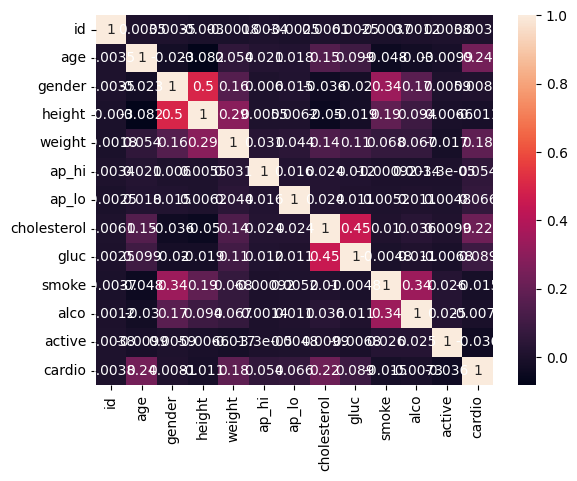

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)


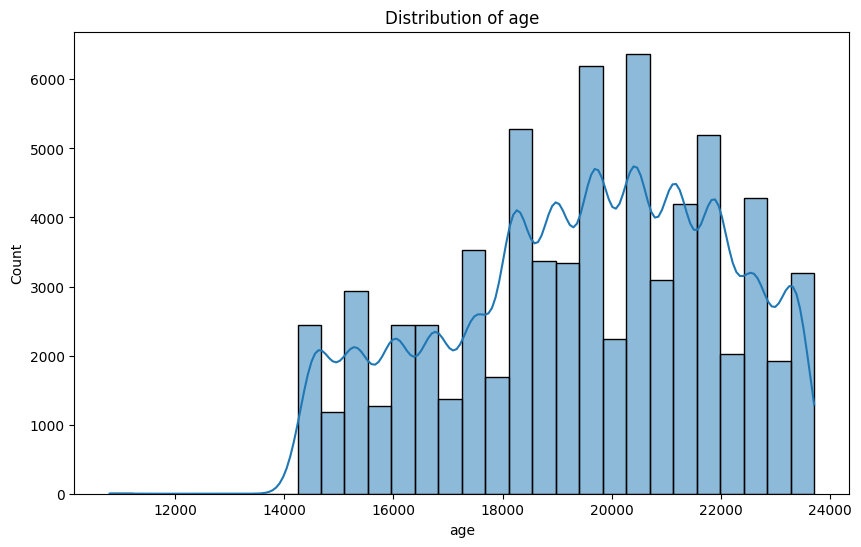

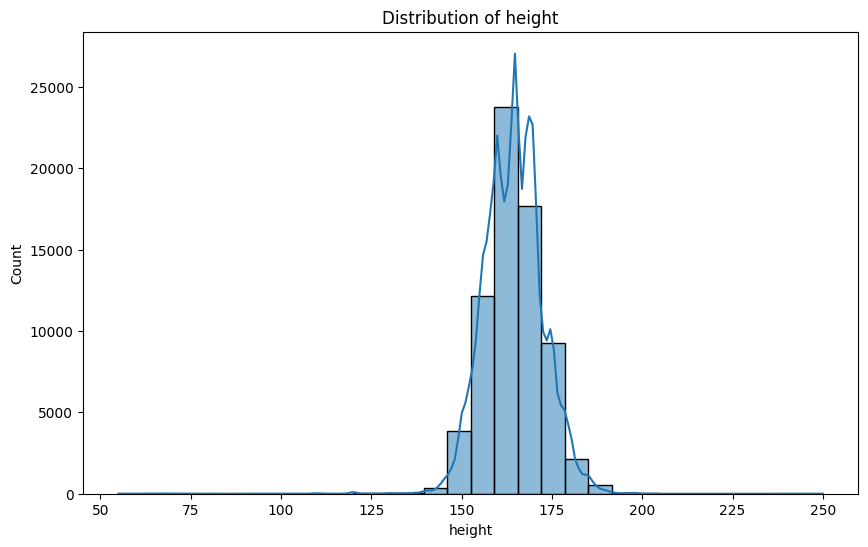

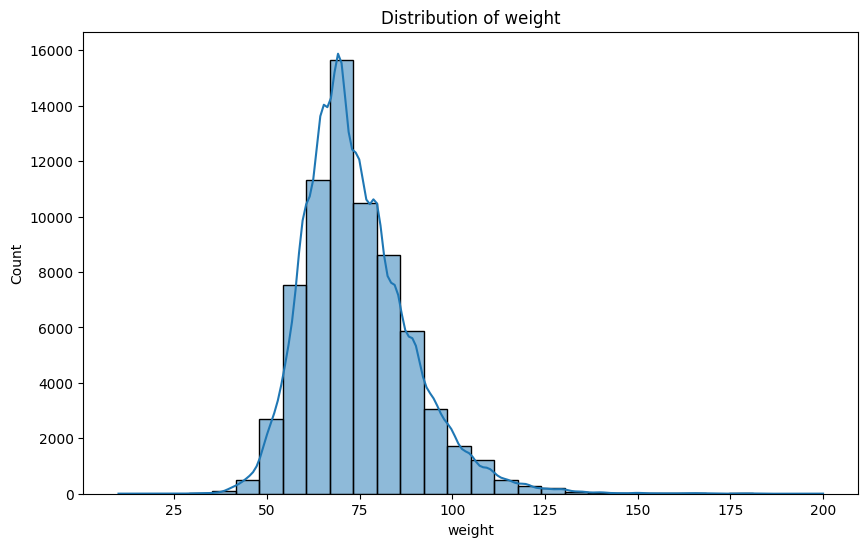

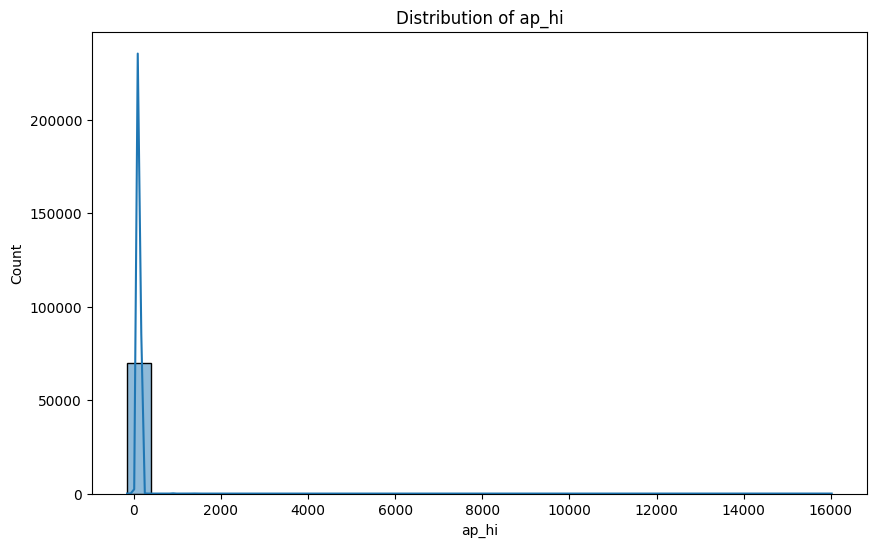

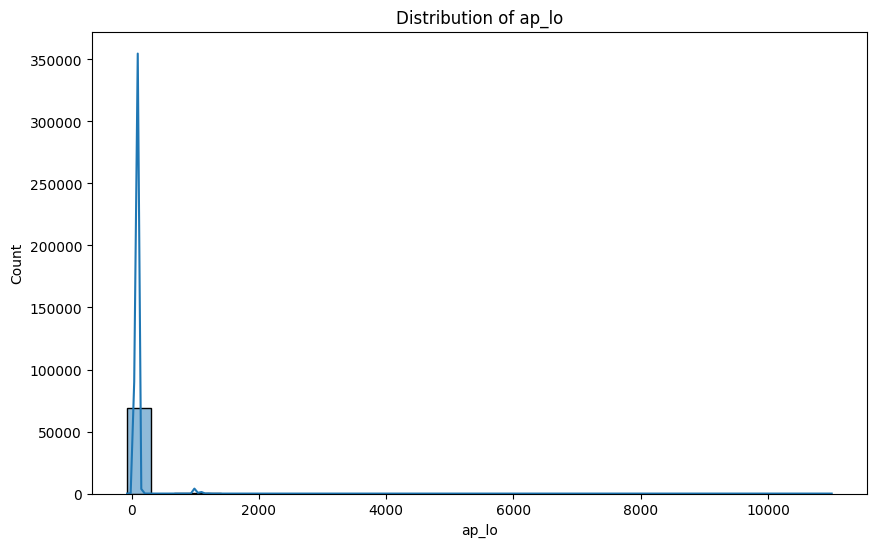

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numerical features
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


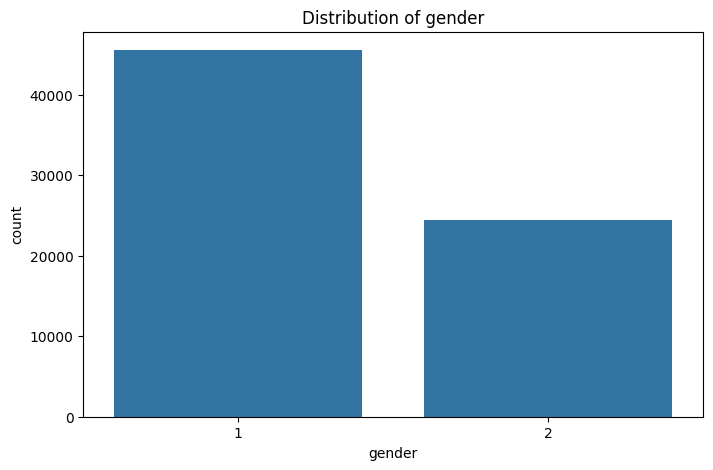

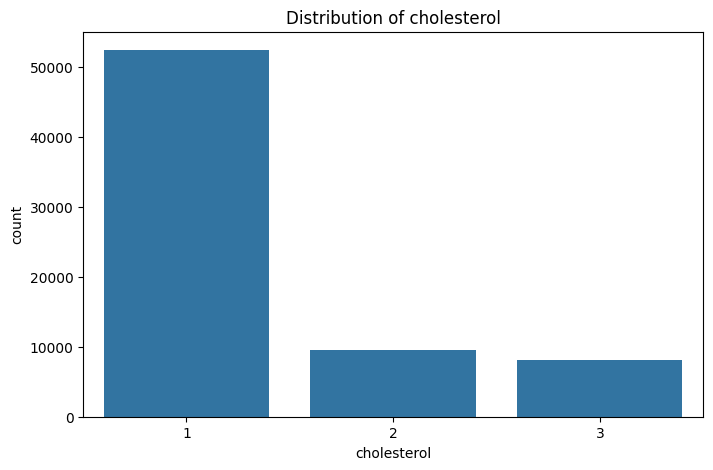

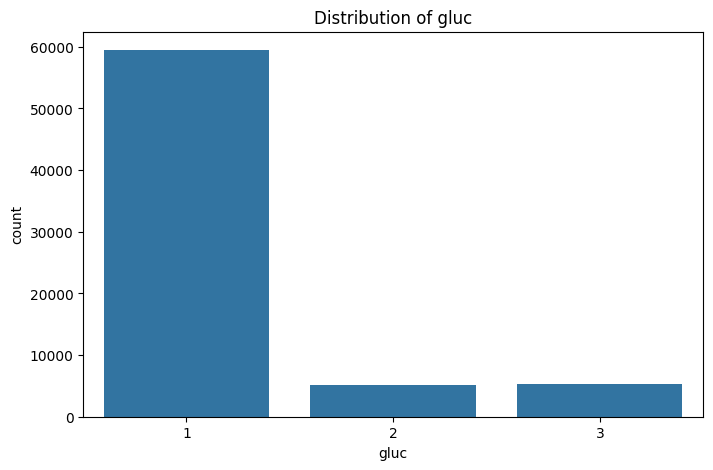

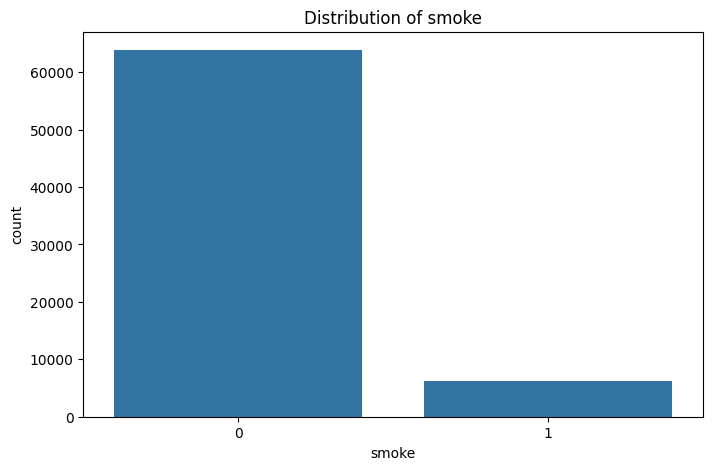

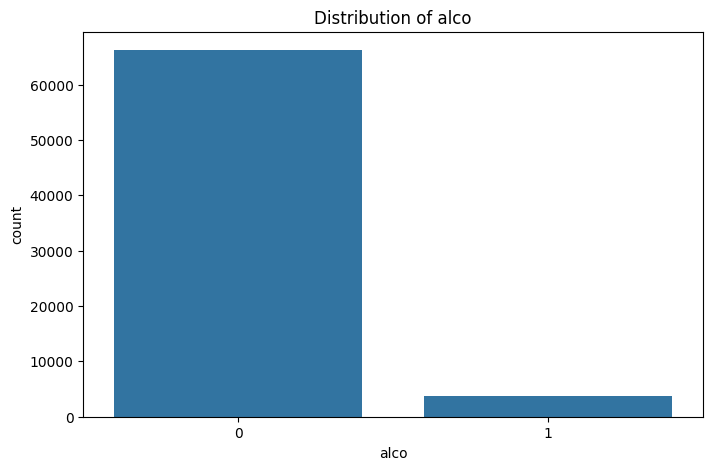

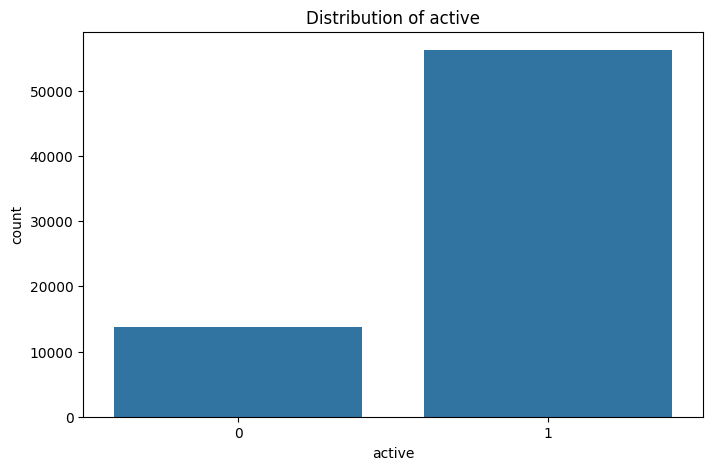

In [11]:
# Plotting count plots for categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()


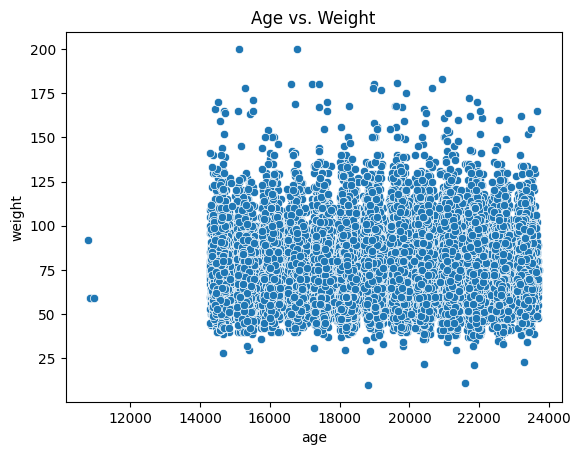

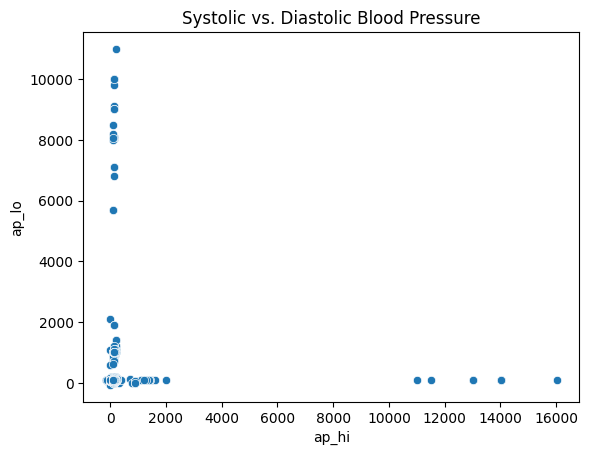

In [ ]:
# Scatter plots for age vs. weight, and systolic vs. diastolic blood pressure
sns.scatterplot(data=df, x='age', y='weight')
plt.title('Age vs. Weight')
plt.show()

sns.scatterplot(data=df, x='ap_hi', y='ap_lo')
plt.title('Systolic vs. Diastolic Blood Pressure')
plt.show()


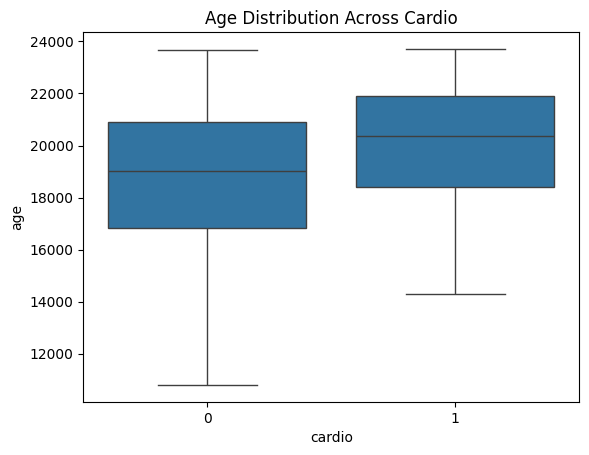

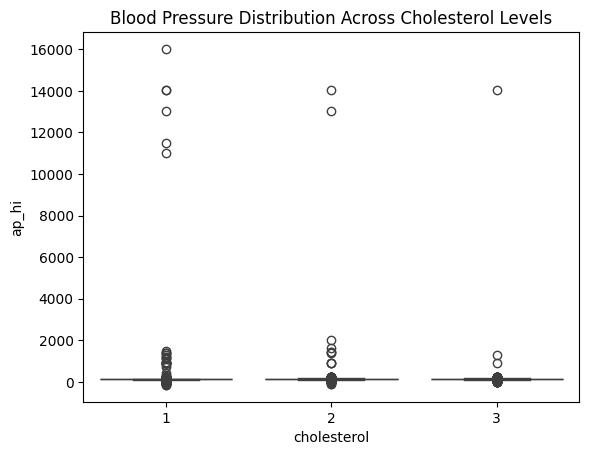

In [ ]:
# Box plot for age distribution across cardio (target variable)
sns.boxplot(data=df, x='cardio', y='age')
plt.title('Age Distribution Across Cardio')
plt.show()

# Box plot for blood pressure distribution across cholesterol levels
sns.boxplot(data=df, x='cholesterol', y='ap_hi')
plt.title('Blood Pressure Distribution Across Cholesterol Levels')
plt.show()


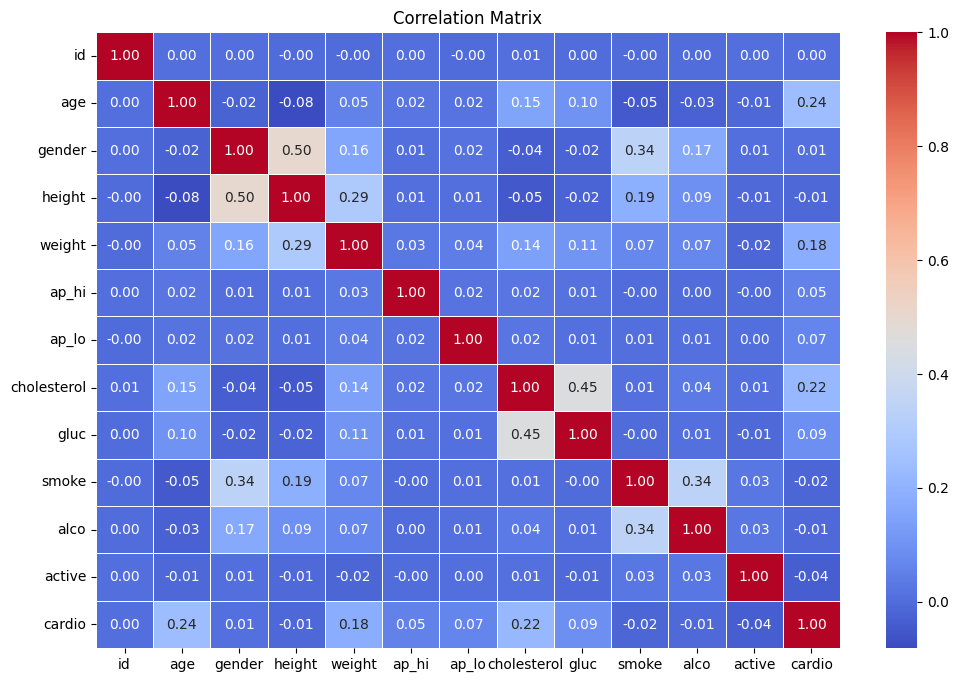

In [ ]:
# Correlation matrix with heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


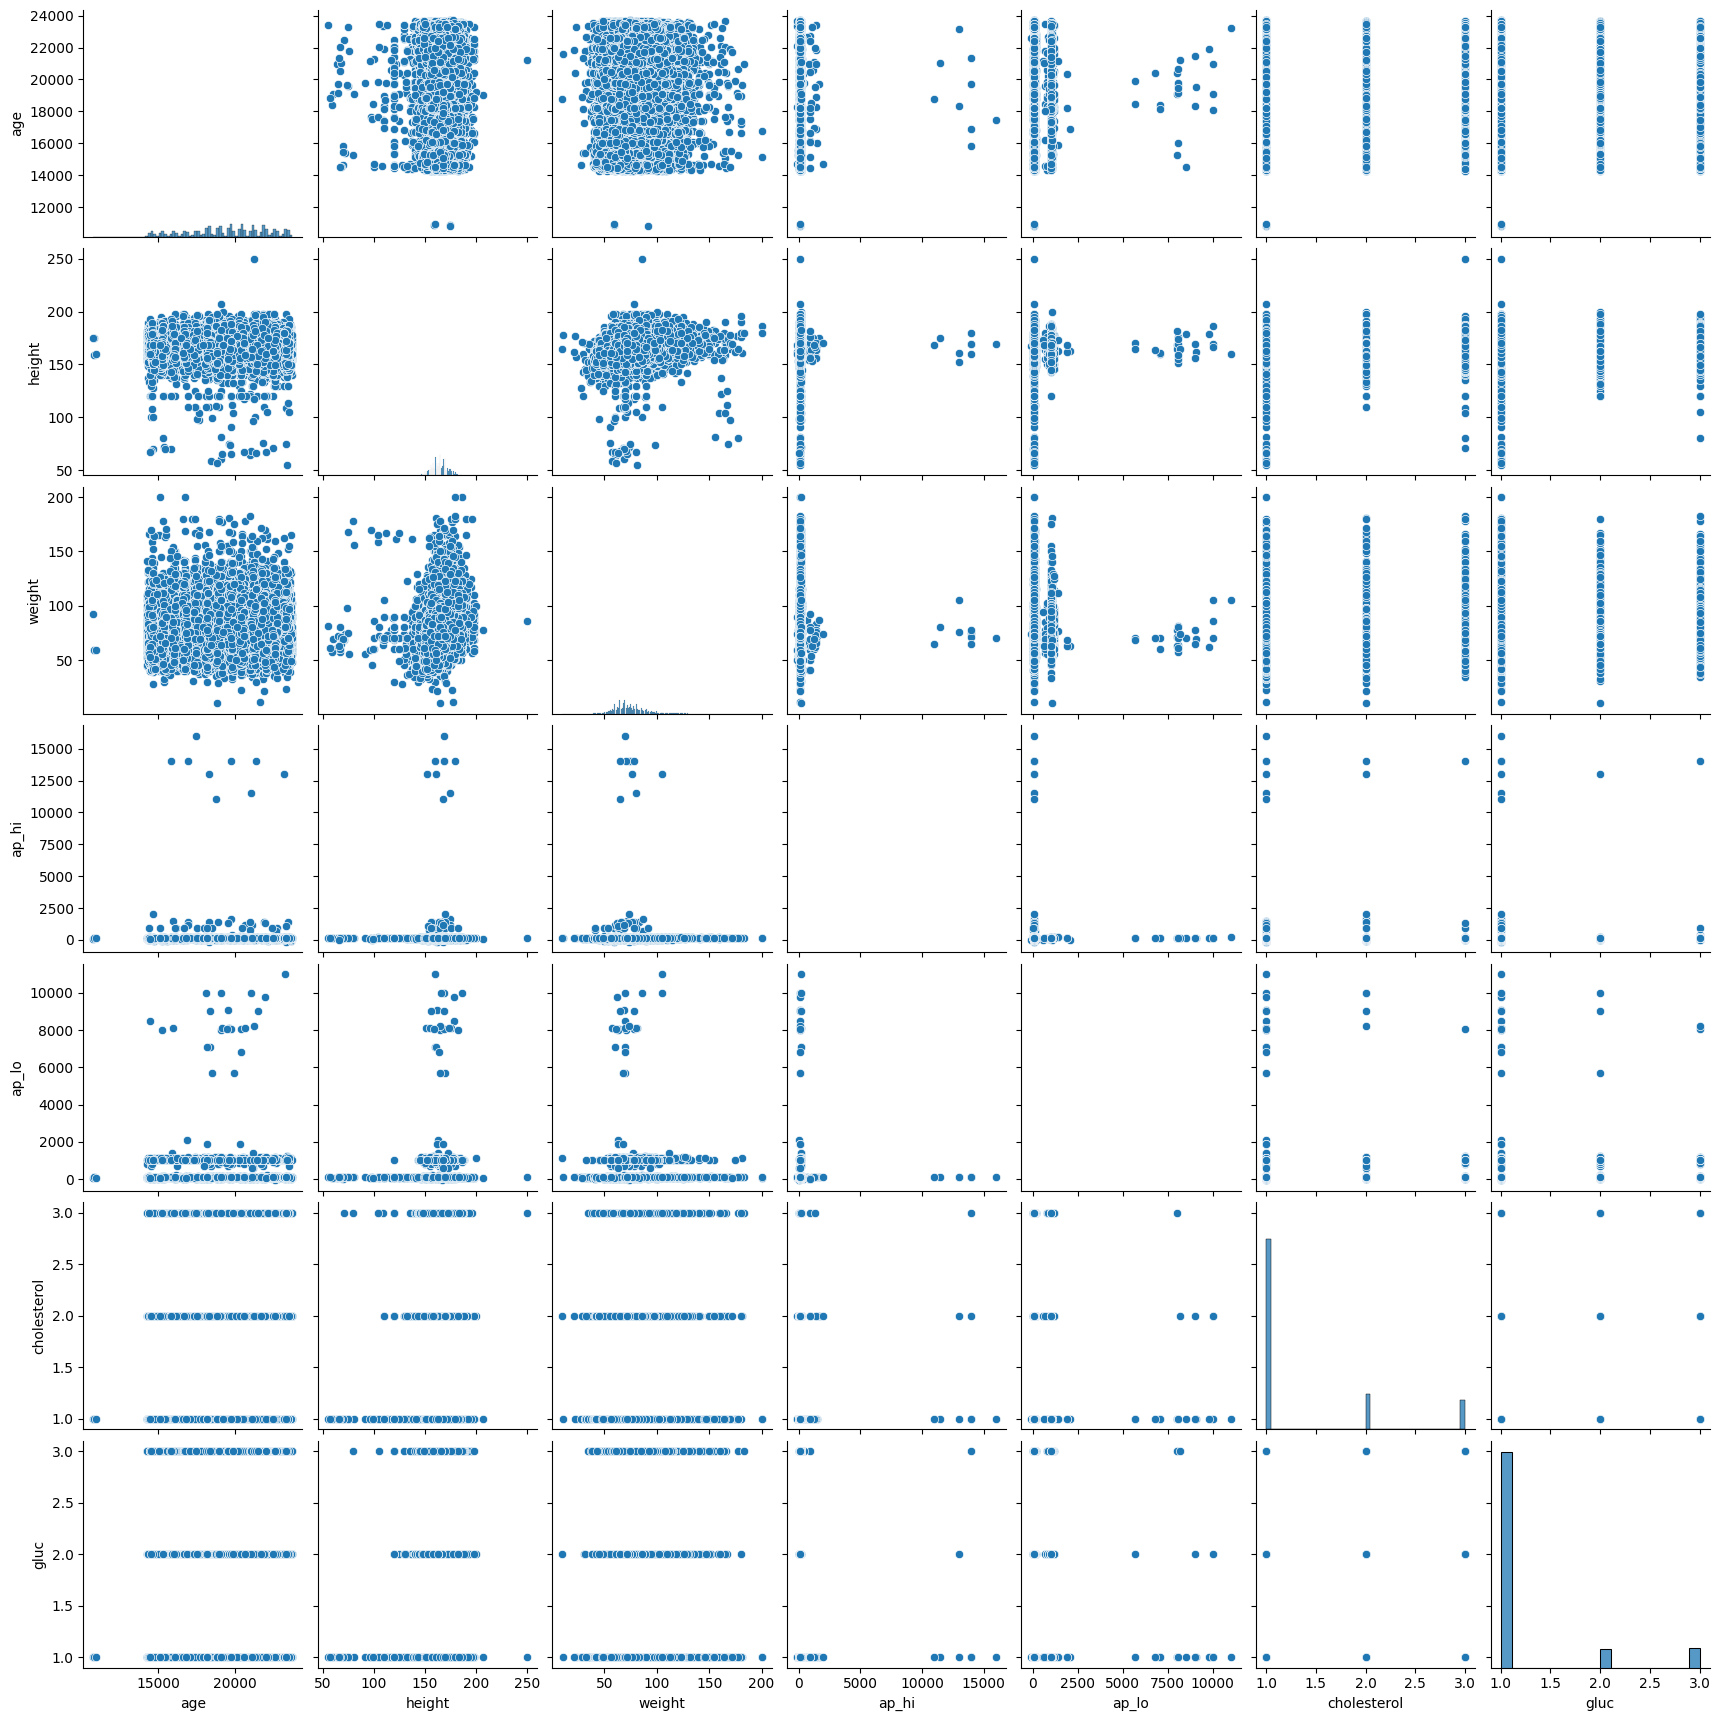

In [ ]:
# Pairplot for numerical features
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']])
plt.show()


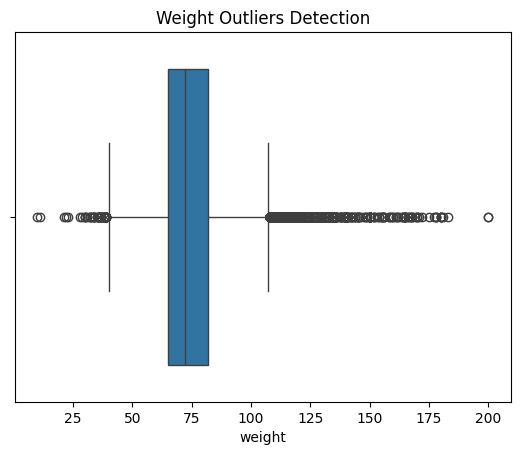

In [ ]:
# Box plot for weight to detect outliers
sns.boxplot(data=df, x='weight')
plt.title('Weight Outliers Detection')
plt.show()


# **Data Transformation**

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")


Missing values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [13]:
# Feature Scaling / Standardizing

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to numerical columns
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [14]:
#  Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode binary categorical columns (smoke, alco, active)
df['smoke'] = label_encoder.fit_transform(df['smoke'])
df['alco'] = label_encoder.fit_transform(df['alco'])
df['active'] = label_encoder.fit_transform(df['active'])


In [16]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [17]:
# Use One-Hot Encoding for multi-class features
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], drop_first=True)


In [18]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke',
       'alco', 'active', 'cardio', 'cholesterol_2', 'cholesterol_3', 'gluc_2',
       'gluc_3'],
      dtype='object')

# Feature Extraction

In [19]:
# Create a new feature: 'bp_cholesterol_interaction'
df['bp_cholesterol_interaction'] = df['ap_hi'] * df['cholesterol_2']  # systolic BP * cholesterol above normal


In [20]:
# Create a new feature: 'smoke_activity_interaction'
df['smoke_activity_interaction'] = df['smoke'] * df['active']  # smoking vs physical activity


In [21]:
print(df.columns)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke',
       'alco', 'active', 'cardio', 'cholesterol_2', 'cholesterol_3', 'gluc_2',
       'gluc_3', 'bp_cholesterol_interaction', 'smoke_activity_interaction'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [23]:
print(df.head)
print(df.info)

<bound method NDFrame.head of           id       age  gender    height    weight     ap_hi     ap_lo  smoke  \
0          0 -0.436062       2  0.443452 -0.847873 -0.122182 -0.088238      0   
1          1  0.307686       1 -1.018168  0.749831  0.072610 -0.035180      0   
2          2 -0.247997       1  0.078047 -0.708942  0.007679 -0.141297      0   
3          3 -0.748152       2  0.565254  0.541435  0.137541  0.017879      0   
4          4 -0.808543       1 -1.018168 -1.264666 -0.187113 -0.194356      0   
...      ...       ...     ...       ...       ...       ...       ...    ...   
69995  99993 -0.092762       2  0.443452  0.124642 -0.057251 -0.088238      1   
69996  99995  1.269492       1 -0.774565  3.597913  0.072610 -0.035180      0   
69997  99996 -0.163286       2  2.270477  2.139139  0.332333 -0.035180      0   
69998  99998  1.200589       1 -0.165556 -0.153219  0.040145 -0.088238      0   
69999  99999  0.434144       1  0.687055 -0.153219 -0.057251 -0.088238      0  

In [24]:
print(df.isnull().sum())


id                            0
age                           0
gender                        0
height                        0
weight                        0
ap_hi                         0
ap_lo                         0
smoke                         0
alco                          0
active                        0
cardio                        0
cholesterol_2                 0
cholesterol_3                 0
gluc_2                        0
gluc_3                        0
bp_cholesterol_interaction    0
smoke_activity_interaction    0
dtype: int64


In [25]:
corr_matrix = df.corr()
print(corr_matrix)


                                  id       age    gender    height    weight  \
id                          1.000000  0.003457  0.003502 -0.003038 -0.001830   
age                         0.003457  1.000000 -0.022811 -0.081515  0.053684   
gender                      0.003502 -0.022811  1.000000  0.499033  0.155406   
height                     -0.003038 -0.081515  0.499033  1.000000  0.290968   
weight                     -0.001830  0.053684  0.155406  0.290968  1.000000   
ap_hi                       0.003356  0.020764  0.006005  0.005488  0.030702   
ap_lo                      -0.002529  0.017647  0.015254  0.006150  0.043710   
smoke                      -0.003699 -0.047633  0.338135  0.187989  0.067780   
alco                        0.001210 -0.029723  0.170966  0.094419  0.067113   
active                      0.003755 -0.009927  0.005866 -0.006570 -0.016867   
cardio                      0.003799  0.238159  0.008109 -0.010821  0.181660   
cholesterol_2               0.001275  0.

In [26]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['id', 'cardio'])  # Dropping 'id' and target 'cardio'
y = df['cardio']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Performance:
Accuracy: 0.7223571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Confusion Matrix:
 [[5363 1625]
 [2262 4750]]
ROC-AUC Score: 0.7866427505419609
RMSE: 0.5269182641955554
F1-Score: 0.7096436841712109


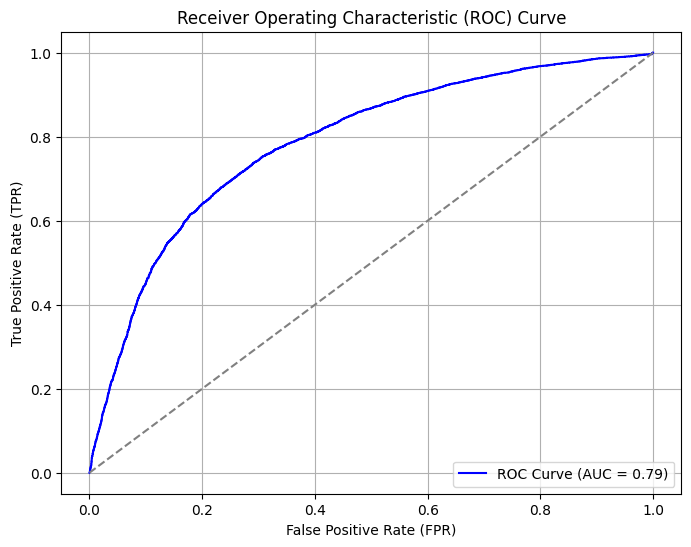

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)  # Predicted probabilities

# Evaluate the model
print("Logistic Regression Performance:")
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Additional Metrics:

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log_reg))
print(f"RMSE: {rmse}")

# F1-Score
f1 = f1_score(y_test, y_pred_log_reg)
print(f"F1-Score: {f1}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg[:, 1])  # Get false positive rate, true positive rate

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Random Forest Performance:
Accuracy: 0.7122142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Confusion Matrix:
 [[5058 1930]
 [2099 4913]]
ROC-AUC Score: 0.770171385809787
RMSE: 0.5364566285224877
F1-Score: 0.7092024539877301


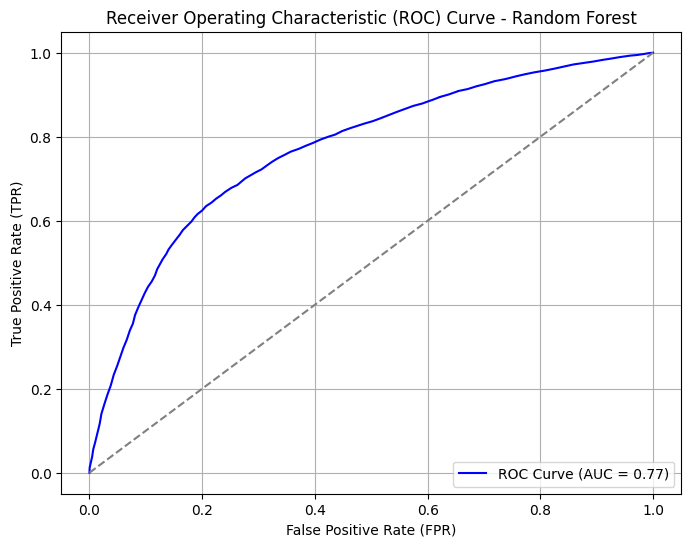

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)  # Predicted probabilities

# Evaluate the model
print("\nRandom Forest Performance:")
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Additional Metrics:

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])
print(f"ROC-AUC Score: {roc_auc_rf}")

# RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE: {rmse_rf}")

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {f1_rf}")

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])  # Get false positive rate, true positive rate

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Gradient Boosting Performance:
Accuracy: 0.7376428571428572
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Confusion Matrix:
 [[5373 1615]
 [2058 4954]]
ROC-AUC Score: 0.8037648416762695
RMSE: 0.5122081050287498
F1-Score: 0.7295486341211987


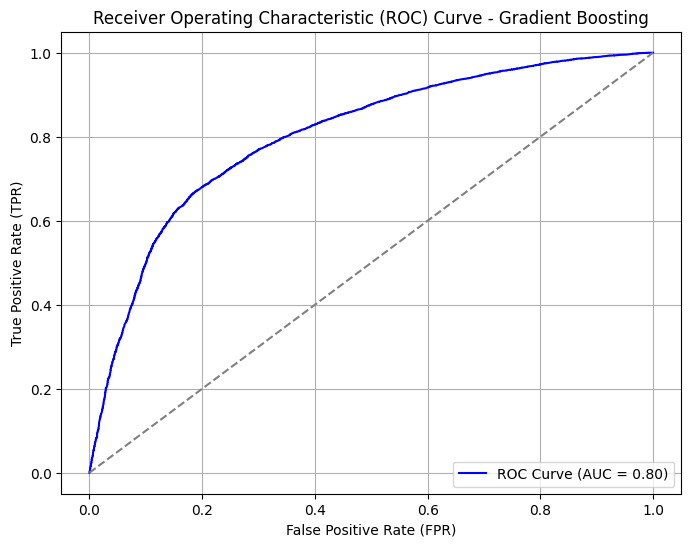

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)  # Predicted probabilities

# Evaluate the model
print("\nGradient Boosting Performance:")
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Additional Metrics:

# ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb[:, 1])
print(f"ROC-AUC Score: {roc_auc_gb}")

# RMSE (Root Mean Squared Error)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"RMSE: {rmse_gb}")

# F1-Score
f1_gb = f1_score(y_test, y_pred_gb)
print(f"F1-Score: {f1_gb}")

# Plot ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb[:, 1])  # Get false positive rate, true positive rate

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define a reduced Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 150],  # Reduced range
    'max_depth': [5, 10],  # Reduced depth
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV with fewer iterations and folds
random_search_rf = RandomizedSearchCV(rf, param_distributions=rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

# Best hyperparameters
print("Best hyperparameters found for Random Forest:", random_search_rf.best_params_)

# Evaluate the tuned model
rf_best = random_search_rf.best_estimator_

# Predict on test data
y_pred_rf = rf_best.predict(X_test)  # Assuming X_test is your test data

# Print classification report and confusion matrix
print("Random Forest Tuned Performance:")
print(classification_report(y_test, y_pred_rf))  # Assuming y_test is your test labels
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters found for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest Tuned Performance:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.77      0.68      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Confusion Matrix:
[[5532 1456]
 [2224 4788]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define hyperparameters grid (reduced search space)
gb_param_grid = {
    'n_estimators': [50, 100, 150],  # Reduced number of boosting stages
    'learning_rate': [0.05, 0.1],  # Reduced learning rate values
    'max_depth': [3, 5],  # Fewer max depths
    'min_samples_split': [2, 5]  # Fewer splits
}

# Initialize RandomizedSearchCV with 2-fold cross-validation (cv=2) for faster computation
gb_random_search = RandomizedSearchCV(gb_model, gb_param_grid, n_iter=10, cv=2, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
gb_random_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best hyperparameters for Gradient Boosting:", gb_random_search.best_params_)

# Get the best model
best_gb_model = gb_random_search.best_estimator_

# Evaluate performance
y_pred_gb = best_gb_model.predict(X_test)
print("\nGradient Boosting Tuned Performance:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}

Gradient Boosting Tuned Performance:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

[[5373 1615]
 [2058 4954]]


In [ ]:
from scipy import stats

# List of numerical columns to perform T-test for
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Perform T-test for each numerical feature
t_test_results = {}
for col in numerical_columns:
    group_0 = df[df['cardio'] == 0][col]
    group_1 = df[df['cardio'] == 1][col]
    t_stat, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')  # omitting NaN values
    t_test_results[col] = {'t_stat': t_stat, 'p_value': p_value}

# Display the results
print(t_test_results)


{'age': {'t_stat': -64.87686765829973, 'p_value': 0.0}, 'height': {'t_stat': 2.8631096598426815, 'p_value': 0.004196298813630023}, 'weight': {'t_stat': -48.87512543719459, 'p_value': 0.0}, 'ap_hi': {'t_stat': -14.433971181239732, 'p_value': 3.6980921263781043e-47}, 'ap_lo': {'t_stat': -17.424953697767403, 'p_value': 7.424551292662221e-68}}


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Select categorical features and the target variable
categorical_features = ['smoke', 'alco', 'cholesterol_2', 'cholesterol_3', 'gluc_2', 'gluc_3']
X = df[categorical_features]
y = df['cardio']

# Encoding categorical variables to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Performing Chi-Squared test
chi2_stat, p_values = chi2(X_encoded, y)

# Display the results
chi_squared_results = pd.DataFrame({'Feature': categorical_features, 'Chi2 Stat': chi2_stat, 'p-value': p_values})
print(chi_squared_results)


         Feature    Chi2 Stat       p-value
0          smoke    15.307580  9.134921e-05
1           alco     3.559012  5.922296e-02
2  cholesterol_2   400.962543  3.399396e-89
3  cholesterol_3  2278.328834  0.000000e+00
4         gluc_2   180.959977  2.991034e-41
5         gluc_3   319.064828  2.315276e-71


In [ ]:
from scipy import stats

# List of continuous features to test with ANOVA
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Dictionary to store results
anova_results = {}

# Perform ANOVA for each feature
for feature in continuous_features:
    group_0 = df[df['cardio'] == 0][feature]
    group_1 = df[df['cardio'] == 1][feature]

    # Perform the ANOVA test
    f_stat, p_value = stats.f_oneway(group_0, group_1)

    # Store the results
    anova_results[feature] = {'f_stat': f_stat, 'p_value': p_value}

# Display the results
anova_results


{'age': {'f_stat': 4209.007957152538, 'p_value': 0.0},
 'height': {'f_stat': 8.197396924284478, 'p_value': 0.004196298813530794},
 'weight': {'f_stat': 2388.777886501506, 'p_value': 0.0},
 'ap_hi': {'f_stat': 208.33952406085913, 'p_value': 3.6980921262798253e-47},
 'ap_lo': {'f_stat': 303.6290113693379, 'p_value': 7.424551292500745e-68}}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler

In [ ]:
url = r"/content/heart (1).csv"
data = pd.read_csv(url)

print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3    0.23  
1   0     3    0.37  
2   0     3    0.24  
3   1     3    0.28  
4   3     2    0.21  


In [ ]:
# Data preprocessing
# Check for missing values
print(data.isnull().sum())

# Fill missing values
data = data.fillna(data.mean())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check the first few values of 'target' column
print("Initial target values:")
print(data['target'].head())

# Set a threshold to convert continuous values to binary labels
threshold = 0.5
data['target'] = data['target'].apply(lambda x: 1 if x >= threshold else 0)

# Check the updated target distribution
print("Updated target values:")
print(data['target'].value_counts())


Initial target values:
0    0.23
1    0.37
2    0.24
3    0.28
4    0.21
Name: target, dtype: float64
Updated target values:
target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['cp'] = label_encoder.fit_transform(data['cp'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['exang'] = label_encoder.fit_transform(data['exang'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['thal'] = label_encoder.fit_transform(data['thal'])

In [ ]:
# Feature Selection
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Target class distribution in the dataset:")
print(y.value_counts())


Target class distribution in the dataset:
target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Resample the training set to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Verify the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after resampling:
target
0    421
1    421
Name: count, dtype: int64


In [ ]:
# Model building and evaluation

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy:  0.8097560975609757
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Decision Tree Accuracy:  0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Cross-validation for Logistic Regression
cross_val_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores: ", cross_val_log_reg)

Random Forest Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Logistic Regression Cross-Validation Scores:  [0.86585366 0.87195122 0.83536585 0.84146341 0.80487805]


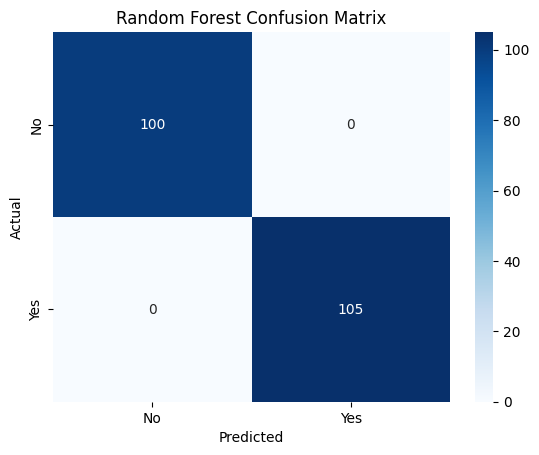

Random Forest ROC-AUC Score:  1.0


In [ ]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score for Random Forest
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print("Random Forest ROC-AUC Score: ", roc_auc)

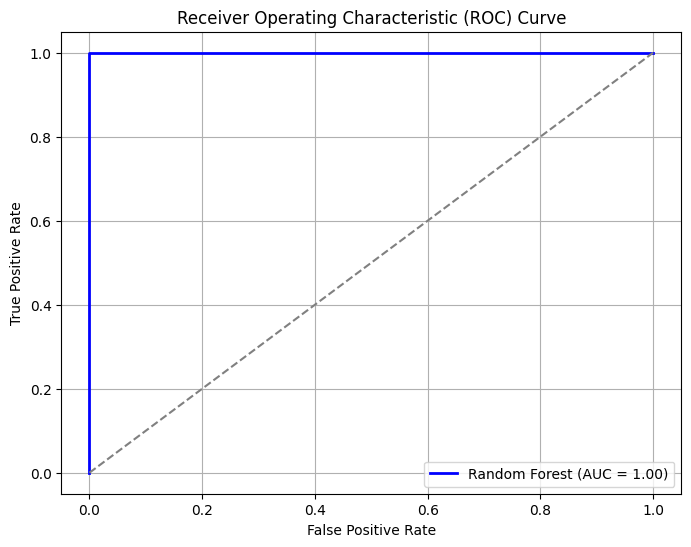

In [ ]:
# Plot ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest with optimized parameters Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



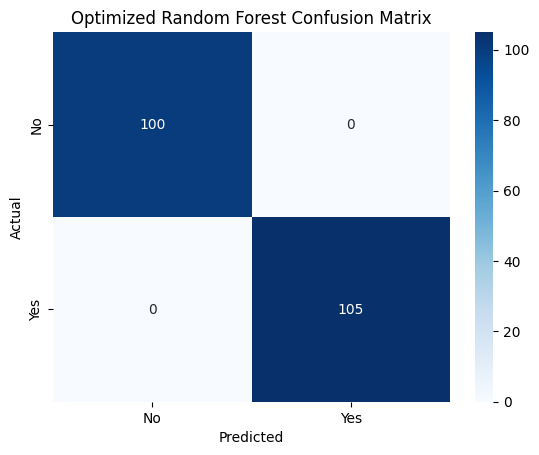

Optimized Random Forest ROC-AUC Score:  1.0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_optimized = best_rf_model.predict(X_test)
print("Random Forest with optimized parameters Accuracy: ", accuracy_score(y_test, y_pred_rf_optimized))
print(classification_report(y_test, y_pred_rf_optimized))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_optimized)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title('Optimized Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Score for optimized Random Forest
roc_auc_rf_optimized = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("Optimized Random Forest ROC-AUC Score: ", roc_auc_rf_optimized)


In [ ]:
from scipy import stats

# Define the categorical columns based on your dataset
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Statistical Test - ANOVA (Analysis of Variance)
for col in categorical_columns:
    # Perform one-way ANOVA between target=0 (No heart attack) and target=1 (Heart attack)
    f_statistic, p_value = stats.f_oneway(data[data['target'] == 0][col], data[data['target'] == 1][col])
    print(f"ANOVA for {col}: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for sex: F-statistic = 86.68970710285936, p-value = 7.523831193727827e-20
ANOVA for cp: F-statistic = 238.55845714404754, p-value = 1.5632057633820675e-48
ANOVA for fbs: F-statistic = 1.7363518455148195, p-value = 0.18789674942246454
ANOVA for restecg: F-statistic = 18.8382049977252, p-value = 1.564103432872726e-05
ANOVA for exang: F-statistic = 242.8838894924462, p-value = 2.6949316902688326e-49
ANOVA for slope: F-statistic = 138.67939281921736, p-value = 4.122053483392168e-30
ANOVA for thal: F-statistic = 131.80299644434777, p-value = 8.781191683221719e-29
